In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
data=pd.read_csv("/content/google_review_changed.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5455 non-null   object 
 1   Category 1   5455 non-null   float64
 2   Category 2   5455 non-null   float64
 3   Category 3   5455 non-null   float64
 4   Category 4   5455 non-null   float64
 5   Category 5   5455 non-null   float64
 6   Category 6   5455 non-null   float64
 7   Category 7   5455 non-null   float64
 8   Category 8   5455 non-null   float64
 9   Category 9   5455 non-null   float64
 10  Category 10  5455 non-null   float64
 11  Category 11  5455 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5455 non-null   float64
 14  Category 14  5455 non-null   float64
 15  Category 15  5455 non-null   float64
 16  Category 16  5455 non-null   float64
 17  Category 17  5455 non-null   float64
 18  Category 18  5455 non-null   float64
 19  Category 19

In [ ]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.56066
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.17167
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.88000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.29000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.66000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [ ]:
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Category 11']= data['Category 11'].astype('float')

In [ ]:
data.drop(['User'],axis=1,inplace=True)

In [ ]:
inertia = []
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

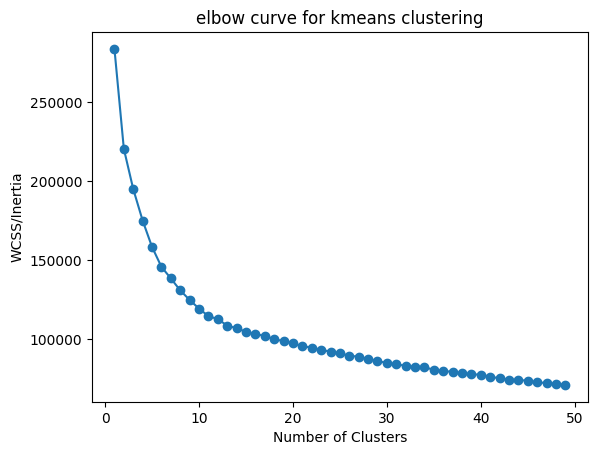

In [ ]:
plt.plot(range(1,50),inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/Inertia')
plt.title('elbow curve for kmeans clustering')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=12,random_state=123)
kmeans.fit(data)
data['Clusters']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(silhouette_score(data,kmeans.fit_predict(data)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.21610517286202444


In [ ]:
data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Clusters
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5455 non-null   float64
 1   Category 2   5455 non-null   float64
 2   Category 3   5455 non-null   float64
 3   Category 4   5455 non-null   float64
 4   Category 5   5455 non-null   float64
 5   Category 6   5455 non-null   float64
 6   Category 7   5455 non-null   float64
 7   Category 8   5455 non-null   float64
 8   Category 9   5455 non-null   float64
 9   Category 10  5455 non-null   float64
 10  Category 11  5455 non-null   float64
 11  Category 12  5455 non-null   float64
 12  Category 13  5455 non-null   float64
 13  Category 14  5455 non-null   float64
 14  Category 15  5455 non-null   float64
 15  Category 16  5455 non-null   float64
 16  Category 17  5455 non-null   float64
 17  Category 18  5455 non-null   float64
 18  Category 19  5455 non-null   float64
 19  Category 20

In [ ]:
data.Clusters.value_counts()

Clusters
3     609
11    608
9     592
5     545
4     536
7     516
1     488
0     485
10    342
8     295
2     238
6     201
Name: count, dtype: int64

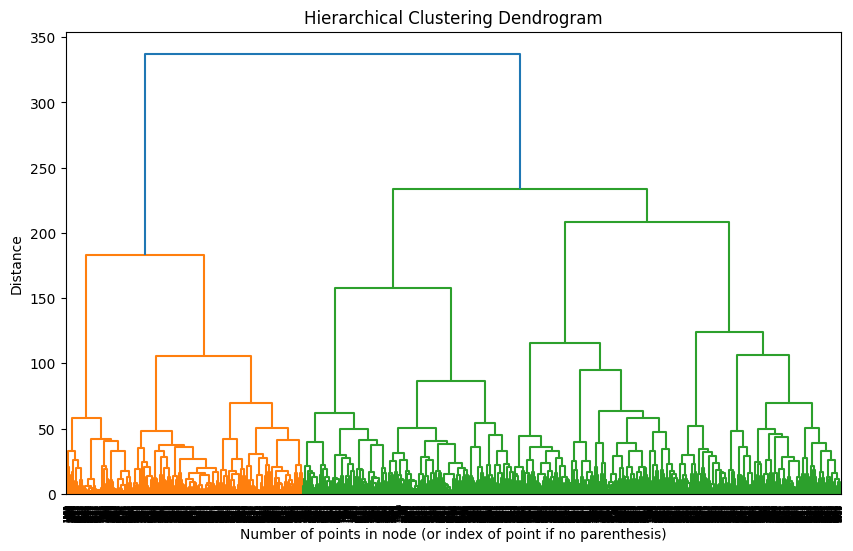

In [ ]:
# Perform hierarchical clustering (linkage calculation)
distance_matrix = linkage(data, method='ward')  # Ward's method for minimizing variance
# Generate the dendrogram
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
dendrogram(distance_matrix, labels=np.arange(len(data)))  # Labels for data points
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg=AgglomerativeClustering(n_clusters=3)
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [ ]:
print(round(silhouette_score(data,agg.fit_predict(data)),2))

0.18


In [ ]:
agg=AgglomerativeClustering(n_clusters=12)
agg.fit(data)
data['Clusters']=agg.labels_

In [ ]:
data.Clusters.value_counts()

Clusters
2     611
9     599
1     599
0     595
5     595
11    567
4     479
7     395
6     345
3     316
8     184
10    170
Name: count, dtype: int64